# Questão 1

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
from IPython.display import clear_output


2023-07-07 21:22:09.285806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 21:22:09.323182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 21:22:09.323756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 21:22:10.022247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## Ajustando os dados

    Foi feita a normalização dos dados

    Primeiramente separado o dataset entre Treino e Teste com 80% e 20% respectivamente.

    Em seguida dividio o de Treino com Validação, ficando 64% e 16% do total de dados respectivamente.

In [3]:
# Normalizar os dados
x = normalize(wine.data)
y = wine.target

# Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treino e Validação
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Converter labels para one-hot-encoding
y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)
y_test = to_categorical(y_test, 3)

## MLP
    Foram testados algumas configurações de parâmetros, a seguinte foi a que teve a melhor média de resultados.

    Tem 13 neuronios na Camada de entrada que são das 13 features do Dataset
    2 camadas ocultas com 100 neurônios Relu
    3 neurônios softmax na camada de saida para a classificação. 

In [4]:
MLP = Sequential()
MLP.add(InputLayer(input_shape=(13))) # input layer
MLP.add(Dense(100, activation='relu')) # hidden layer 1
MLP.add(Dense(100, activation='relu')) # hidden layer 2
MLP.add(Dense(3, activation='softmax')) # output layer

MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 11803 (46.11 KB)
Trainable params: 11803 (46.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-07-07 21:22:11.727313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-07 21:22:11.727958: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# Compilando o modelo utilizando o erro de entropia cruzada para a minimização do erro

MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [6]:
#Treinando o modelo com o .fit
# 150 Épocas
# Como o dataset é pequeno (178 samples), foi utilizado apenas batch_size=2
# Dados de validação para treinar o modelo

history = MLP.fit(X_train, y_train,
     epochs=150,
     batch_size=2,
     validation_data=(X_val, y_val),
     verbose=1,
     shuffle=True
     )

Epoch 1/150
71/71 [==============================] - 1s 3ms/step - loss: 1.0959 - accuracy: 0.3592 - val_loss: 1.0752 - val_accuracy: 0.3889
Epoch 2/150
71/71 [==============================] - 0s 1ms/step - loss: 1.0816 - accuracy: 0.4014 - val_loss: 1.0620 - val_accuracy: 0.3889
Epoch 3/150
71/71 [==============================] - 0s 1ms/step - loss: 1.0750 - accuracy: 0.4296 - val_loss: 1.0544 - val_accuracy: 0.3889
Epoch 4/150
71/71 [==============================] - 0s 1ms/step - loss: 1.0591 - accuracy: 0.4577 - val_loss: 1.0448 - val_accuracy: 0.3889
Epoch 5/150
71/71 [==============================] - 0s 1ms/step - loss: 1.0311 - accuracy: 0.4930 - val_loss: 0.9760 - val_accuracy: 0.6667
Epoch 6/150
71/71 [==============================] - 0s 1ms/step - loss: 0.9900 - accuracy: 0.6127 - val_loss: 0.9318 - val_accuracy: 0.7222
Epoch 7/150
71/71 [==============================] - 0s 1ms/step - loss: 0.9407 - accuracy: 0.5775 - val_loss: 0.8799 - val_accuracy: 0.7222
Epoch 8/150
7

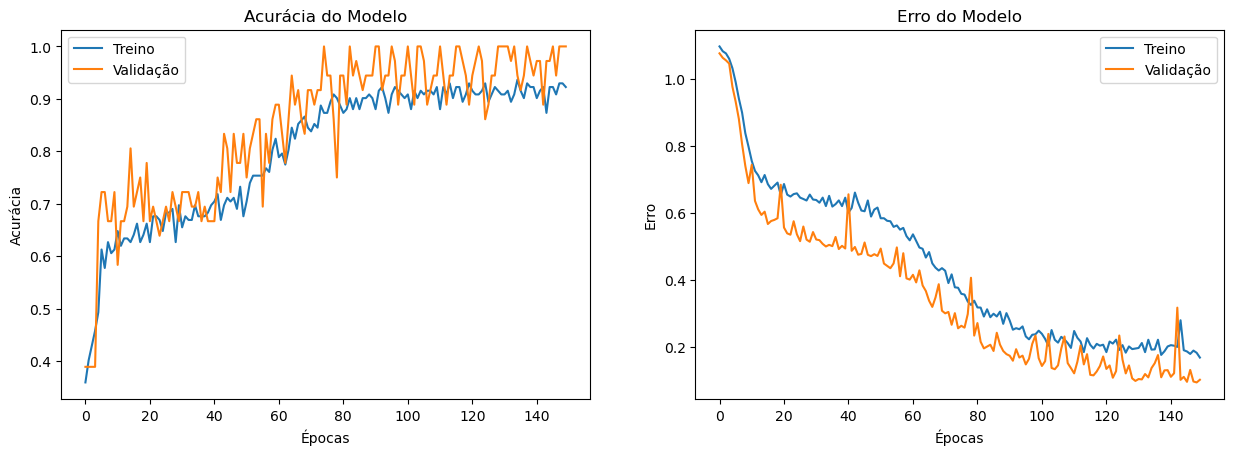

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
#Acuracia do Modelo
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia do Modelo')
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Épocas')
ax1.legend(['Treino', 'Validação'], loc='upper left')


#Erro do Modelo
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Erro do Modelo')
ax2.set_ylabel('Erro')
ax2.set_xlabel('Épocas')
ax2.legend(['Treino', 'Validação'], loc='upper right')


In [8]:
# evaluate performance
test_loss, test_acc = MLP.evaluate(X_test, y_test,
                                   batch_size=2,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.10253739356994629
Test accuracy: 1.0


## Resultados

    O Modelo foi treinado diversas vezes para teste, pelos gráfico de épocas é possível analisar o resultado que a acurácia com os dados de treino estabilizam sem crescer. Os dados de validação no fim ficam entre muito bons e abaixo de 90%, provavelmente pelo dataset possuir poucos dados. Nesse último a acurácia com os dados de teste tiveram 100% de acurácia, porém ao rodar algumas vezes pode chegar a 88%. Assim dependendo da inicialização dos pesos ou se na época não foi favorável.

    Mas é bem possível notar que o aumento das épocas melhora bastante o desempenho do modelo de classificação.